# G2M Insight for Cab Investment Firm

###  Potential Questions to be Anwered:

#### Which Cab Company is More Profitable and/or Serves More Customers? (Yellow Cab or Pink Cab?)

#### How Do Customers Prefer to Pay? (Cash or Card?)

#### In Which Cities Are There the Most Cab Users? In Which Cities Do Cabs Earn the Most Profits?

#### What Kind of Customers Typically Use Cabs the Most Often? (Gender, Age, Income Level)

#### What Time of the Year/Month do  Cab Companies Earn the Greatest Profit?

### Loading and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import xlrd

In [2]:
cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_df = pd.read_csv("Customer_ID.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")

In [3]:
#Viewing the cab data
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#Viewing the city data
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
#Viewing the customer data
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
#Viewing the transaction data
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


#### Removing Missing/NA Values

In [7]:
cab_df.dropna(inplace=True)
city_df.dropna(inplace=True)
customer_df.dropna(inplace=True)
transaction_df.dropna(inplace=True)

#### Converting 'Date of Travel' Column to Datetime Format in the 'Cab_Data.csv' File

In [8]:
cab_df["Date of Travel"] = cab_df["Date of Travel"].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))

In [9]:
cab_df["Date of Travel"].head()

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]

#### Creating a Column For Profit Earned in the 'Cab_Data.csv' Dataframe

In [10]:
cab_df["Profit_Earned"] = cab_df["Price Charged"] - cab_df["Cost of Trip"]

In [11]:
cab_df["Profit_Earned"].head()

0    57.315
1    23.666
2    27.568
3    25.798
4    16.844
Name: Profit_Earned, dtype: float64

#### Changing Values for "Users" and "Population" to Numeric in the 'City.csv' Dataframe

In [12]:
city_df.replace(',','', regex=True, inplace=True)

In [13]:
city_df[["Users", "Population"]] = city_df[["Users", "Population"]].apply(pd.to_numeric,errors='ignore')

#### Adding Another Column for the Percentage of Residents that Use Cab Services in the 'City.csv' Dataframe

In [14]:
city_df['Percent Cab Users'] = city_df['Users'] / city_df['Population'] * 100

In [15]:
city_df.head()

,City,Population,Users,Percent Cab Users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


#### Merging Dataframes

In [16]:
#Merging cab dataset and transaction dataset
df_merged = pd.merge(cab_df,transaction_df, on = "Transaction ID")
#Merging new dataset with customer dataset
df_merged = pd.merge(df_merged,customer_df, on = "Customer ID")

In [17]:
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit_Earned,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237


### Question 1: Which Cab Company is Better? Yellow or Pink?

#### Determining which company earns the highest profit and serves the most customers

In [20]:
#Checking which company earns the highest total profits
total_profits = df_merged.groupby('Company')['Profit_Earned'].sum()

In [21]:
total_profits

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit_Earned, dtype: float64

In [22]:
#Looking at summary statistics for profit earned by each cab company
grouped_df = df_merged.groupby('Company')['Profit_Earned'].describe()


In [23]:
grouped_df

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,62.652174,77.590378,-220.0600,11.206,41.5,93.9650,1119.480
Yellow Cab,274681.0,160.259986,171.823833,-176.9308,37.180,102.0,228.6704,1463.966


In [107]:
customers = df_merged.groupby('Company')['Customer ID'].nunique()

In [108]:
customers

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

#### Looking at profit and number of customers/rides for each city

In [102]:
customer_count_city = df_merged.groupby(['City','Company'])['Customer ID'].nunique()

In [103]:
customer_count_city

City            Company   
ATLANTA GA      Pink Cab      1322
                Yellow Cab    2595
AUSTIN TX       Pink Cab      1354
                Yellow Cab    1914
BOSTON MA       Pink Cab      2463
                Yellow Cab    2997
CHICAGO IL      Pink Cab      2859
                Yellow Cab    3000
DALLAS TX       Pink Cab      1118
                Yellow Cab    2564
DENVER CO       Pink Cab      1145
                Yellow Cab    1681
LOS ANGELES CA  Pink Cab      2996
                Yellow Cab    2998
MIAMI FL        Pink Cab      1480
                Yellow Cab    2334
NASHVILLE TN    Pink Cab      1356
                Yellow Cab     965
NEW YORK NY     Pink Cab      2972
                Yellow Cab    3000
ORANGE COUNTY   Pink Cab      1198
                Yellow Cab    1712
PHOENIX AZ      Pink Cab       763
                Yellow Cab     994
PITTSBURGH PA   Pink Cab       604
                Yellow Cab     574
SACRAMENTO CA   Pink Cab      1078
                Yellow Cab  

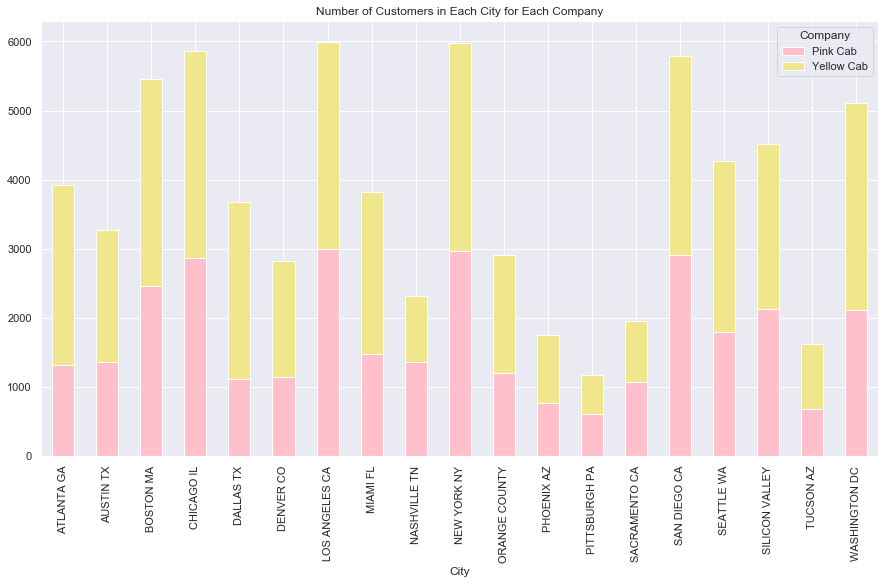

In [104]:
#Looking at the number of customers in each city for each company

customer_count_city.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Number of Customers in Each City for Each Company")

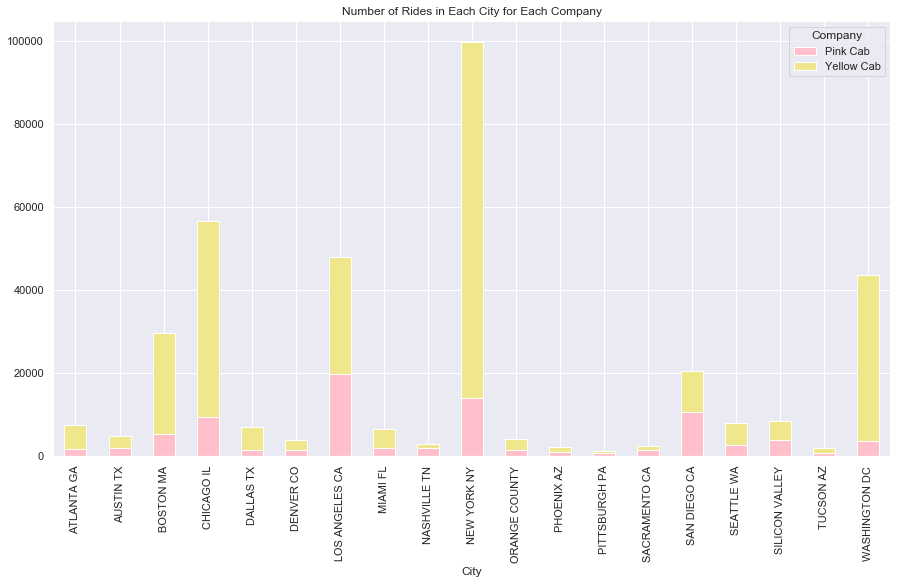

In [98]:
#Looking at the number of rides in each city for each company

ride_count_city = df_merged.groupby(['City','Company'])['Transaction ID'].count()
ride_count_city.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Number of Rides in Each City for Each Company")

In [24]:
#Looking at the total profit earned by each company in each city
total_by_city = df_merged.groupby(['City','Company'])['Profit_Earned'].sum()

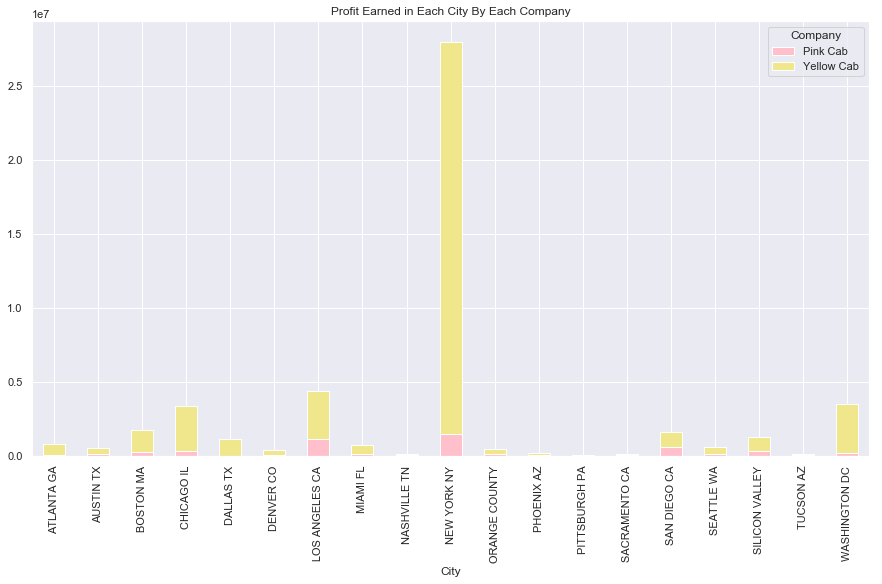

In [109]:
total_by_city.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Profit Earned in Each City By Each Company")

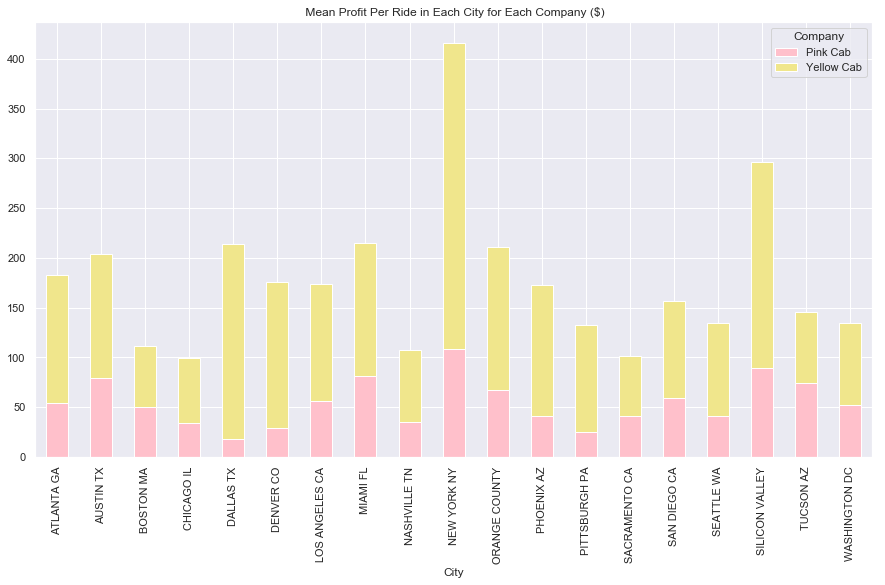

In [115]:
#Showing mean profit per ride in each city for each company

mean_by_city = df_merged.groupby(['City','Company'])['Profit_Earned'].mean()
mean_by_city.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = " Mean Profit Per Ride in Each City for Each Company ($)")

In [32]:
# Finding average profit per km 

df_merged['Profit_per_km'] = df_merged['Profit_Earned'] / df_merged['KM Travelled']

In [34]:
mean_by_city_km = df_merged.groupby(['City','Company'])['Profit_per_km'].mean()


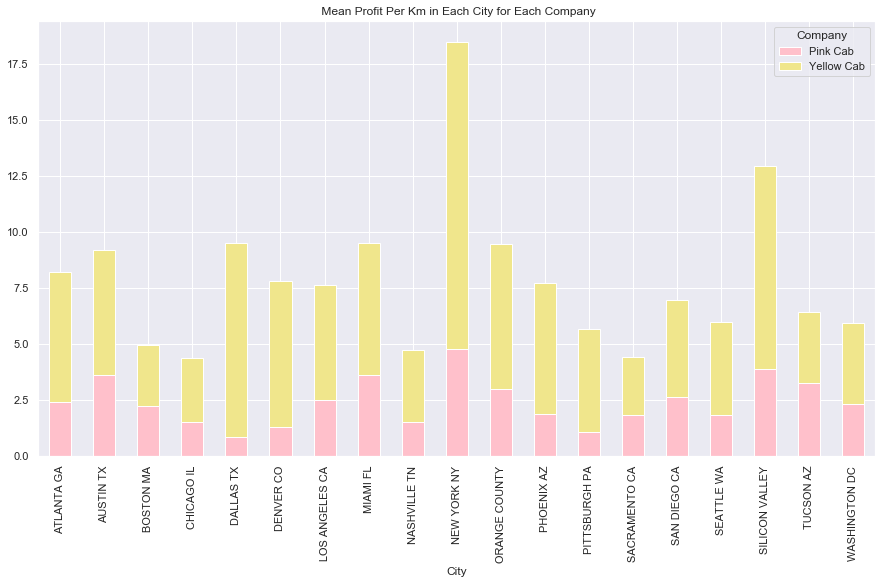

In [116]:
#Plotting mean profit per km in each city for each company

mean_by_city_km.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = " Mean Profit Per Km in Each City for Each Company")

### Question 2: How do Customers Prefer to Pay?

In [36]:
paid_cash = sum(transaction_df["Payment_Mode"] == "Cash")

In [37]:
paid_card = sum(transaction_df["Payment_Mode"] == "Card")

In [38]:
paid_cash #Number of transaction paid with cash

176107

In [39]:
paid_card #Number of transactions paid with card

263991

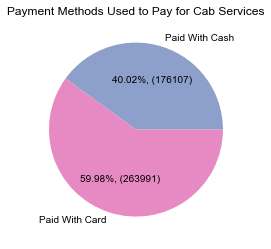

In [40]:
#Creating a pie chart to display results

values = [paid_cash,paid_card]
labels = ["Paid With Cash","Paid With Card"]

plt.pie(values,labels=labels,colors=sns.color_palette('Set2')[2:4],autopct=lambda p:f'{p:.2f}%, ({p*sum(values)/100 :.0f})')
plt.title("Payment Methods Used to Pay for Cab Services",loc="center")
sns.set(rc = {'figure.figsize':(8,6)})
plt.show()

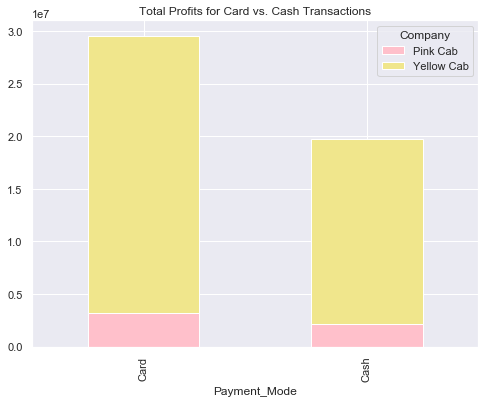

In [41]:
# Creating a plot to show profits from transactions made in cash vs card

payment_method = df_merged.groupby(['Payment_Mode','Company'])['Profit_Earned'].sum()
payment_method.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Total Profits for Card vs. Cash Transactions")

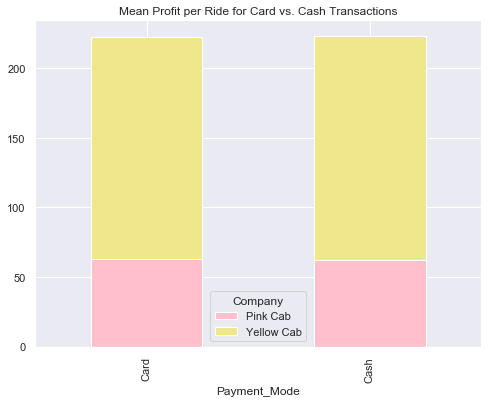

In [42]:
# Plotting average profit for card vs cash transactions

payment_method_mean = df_merged.groupby(['Payment_Mode','Company'])['Profit_Earned'].mean()
payment_method_mean.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Mean Profit per Ride for Card vs. Cash Transactions")


### Question 3: Which Cities Have the Most Cab Users? 

Text(0.5, 1.0, 'Number of Cab Users in Each City')

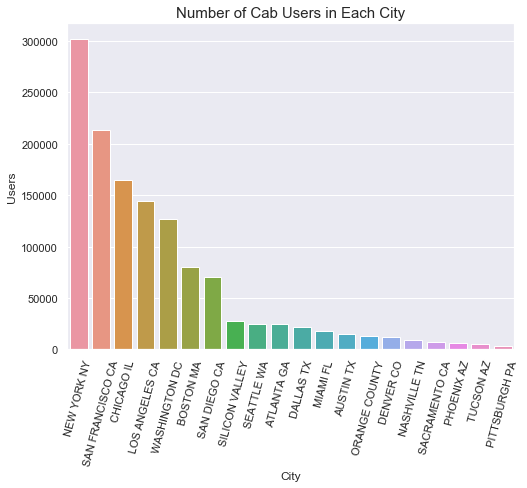

In [43]:
#Creating a bar graph to display the amount of cab users in each city

sns.barplot(x="City", y="Users", data=city_df,order=city_df.sort_values('Users',ascending=False).City)
sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(rotation=75)
plt.title("Number of Cab Users in Each City",fontsize=15)

Text(0.5, 1.0, 'Percentage of Residents That Use Cab Services in Each City')

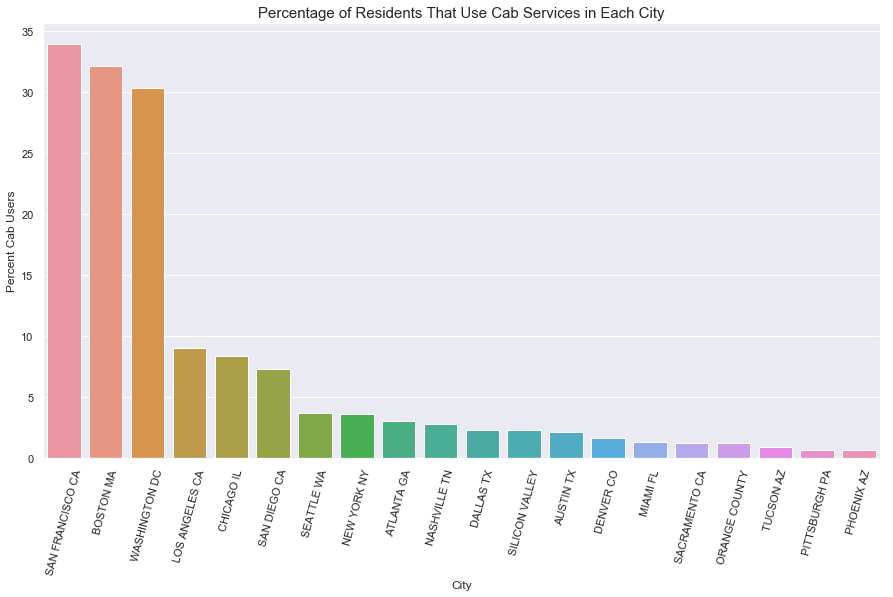

In [44]:
#Creating a bar plot to show the proportion of residents that use cab services in each city

sns.barplot(x="City", y="Percent Cab Users", data=city_df,order=city_df.sort_values('Percent Cab Users',ascending=False).City)
sns.set(rc = {'figure.figsize':(15,8)})
plt.xticks(rotation=75)
plt.title("Percentage of Residents That Use Cab Services in Each City",fontsize=15)

### Question 4: What Kind of Customers Typically Use Cabs?

In [45]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [46]:
#Finding the summary statistics for age and income

customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


#### Visualizing the distribution of age, income, and gender of customers for both cab companies

Text(0.5, 1.0, 'Distribution of Yellow Cab Customer Age')

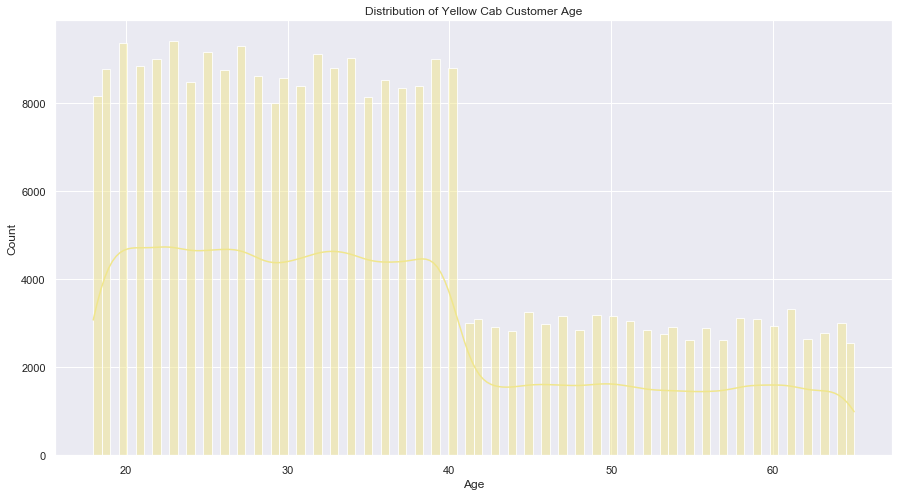

In [47]:
#Showing the distribution of age for yellow cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Yellow Cab"], x="Age", kde=True, color = "khaki")
plt.title("Distribution of Yellow Cab Customer Age")

Text(0.5, 1.0, 'Distribution of Pink Cab Customer Age')

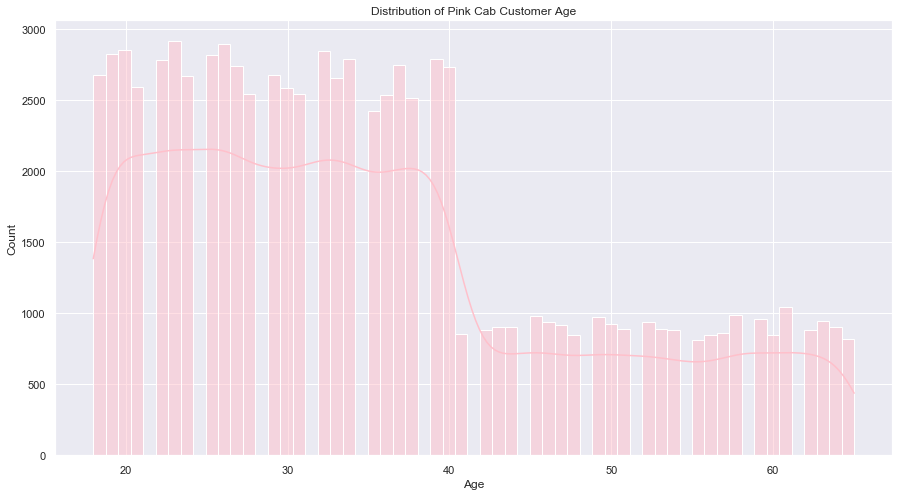

In [48]:
#Showing the distribution of age for pink cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Pink Cab"], x="Age", kde=True, color = "pink")
plt.title("Distribution of Pink Cab Customer Age")

Text(0.5, 1.0, 'Distribution of Yellow Cab Customer Income')

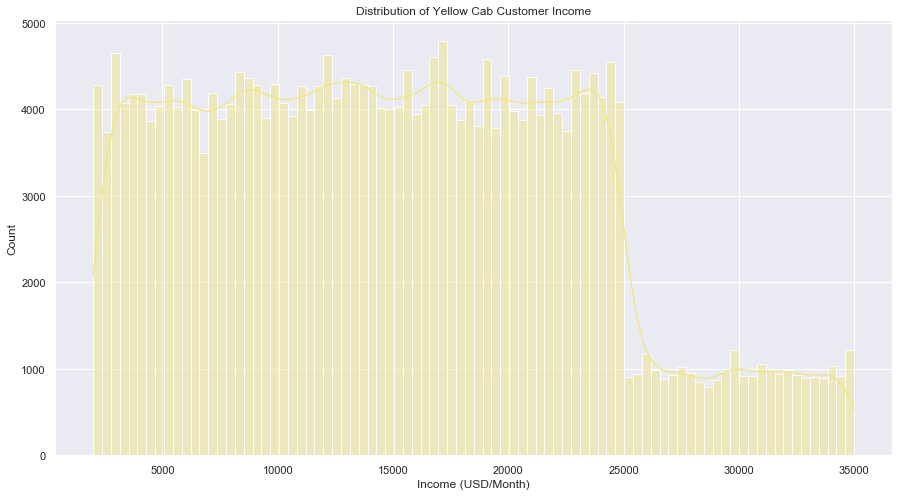

In [49]:
#Showing distribution of income for yellow cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Yellow Cab"], x = "Income (USD/Month)", kde=True, color = "khaki")
plt.title("Distribution of Yellow Cab Customer Income")

Text(0.5, 1.0, 'Distribution of Pink Cab Customer Income')

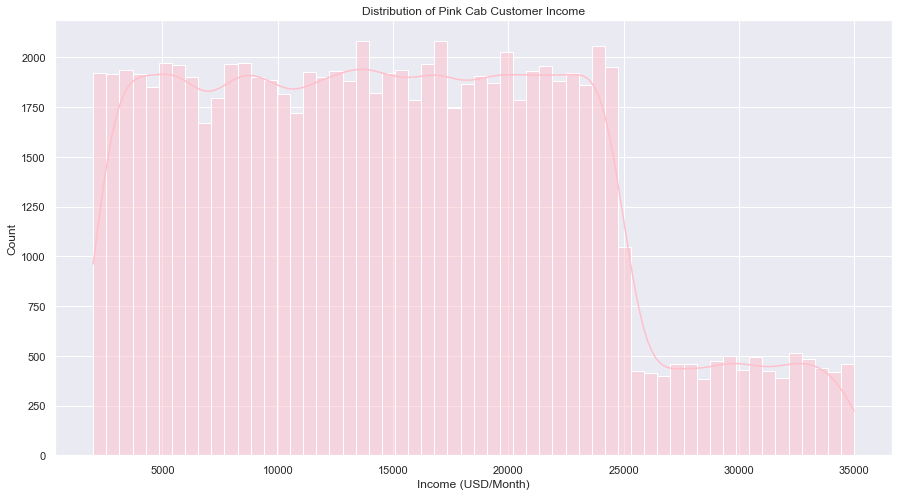

In [50]:
#Showing distribution of income for pink cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Pink Cab"], x = "Income (USD/Month)", kde=True, color = "pink")
plt.title("Distribution of Pink Cab Customer Income")

Text(0.5, 1.0, 'Distribution of Yellow Cab Customer Gender')

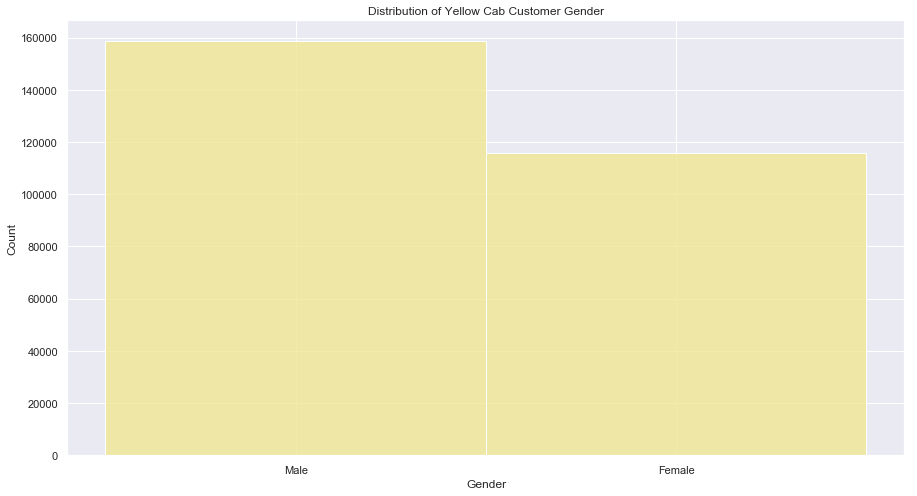

In [51]:
#Showing distribution of gender for yellow cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Yellow Cab"], x = "Gender", color = "khaki")
plt.title("Distribution of Yellow Cab Customer Gender")

Text(0.5, 1.0, 'Distribution of Pink Cab Customer Gender')

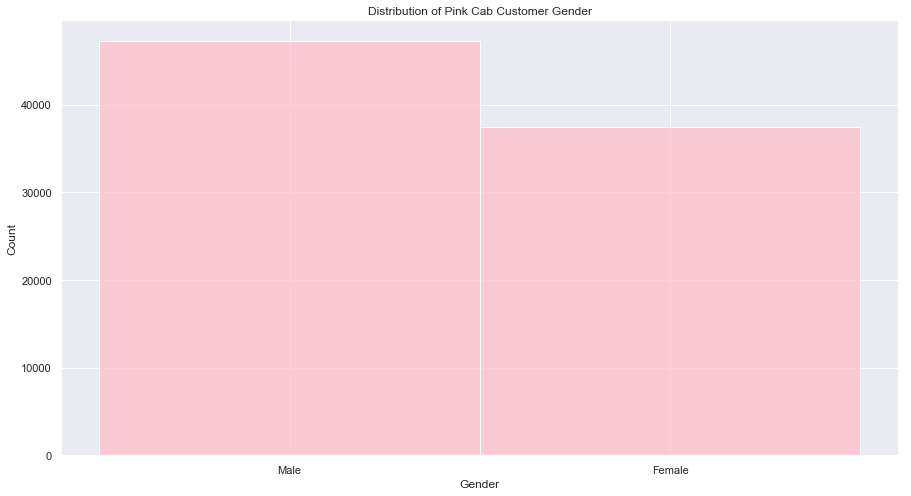

In [52]:
#Showing distribution of gender for pink cab customers

sns.histplot(data=df_merged[df_merged["Company"] == "Pink Cab"], x = "Gender", color = "pink")
plt.title("Distribution of Pink Cab Customer Gender")

#### Creating extra columns for age and income level

In [53]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
df_merged['Income Level'] = pd.cut(df_merged['Income (USD/Month)'], bins)

In [54]:
bins = [10,20,30,40,50,60,70]
df_merged['Age Group'] = pd.cut(df_merged['Age'], bins)

#### Showing the profit earned from customers at different income level, age, and gender

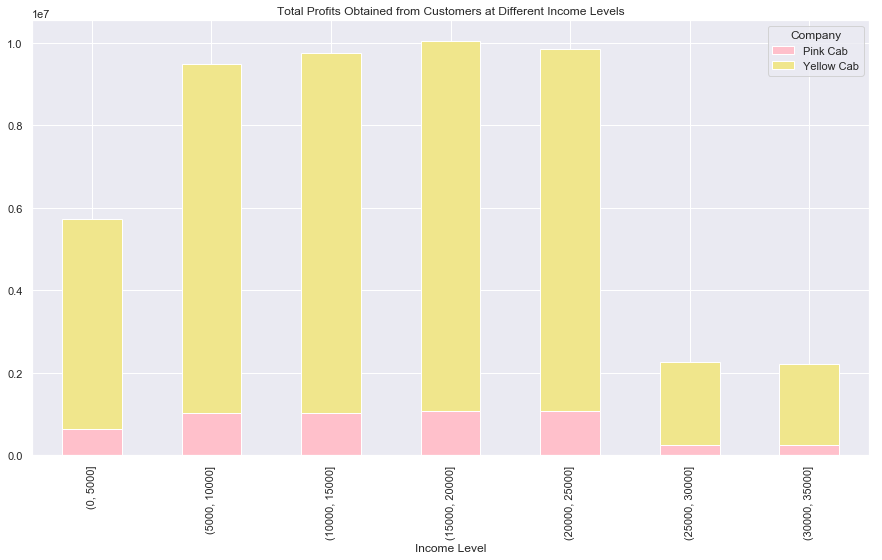

In [55]:
#Total profit earned by customers at different levels of income 

income_total = df_merged.groupby(['Income Level','Company'])['Profit_Earned'].sum()
income_total.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Total Profits Obtained from Customers at Different Income Levels")

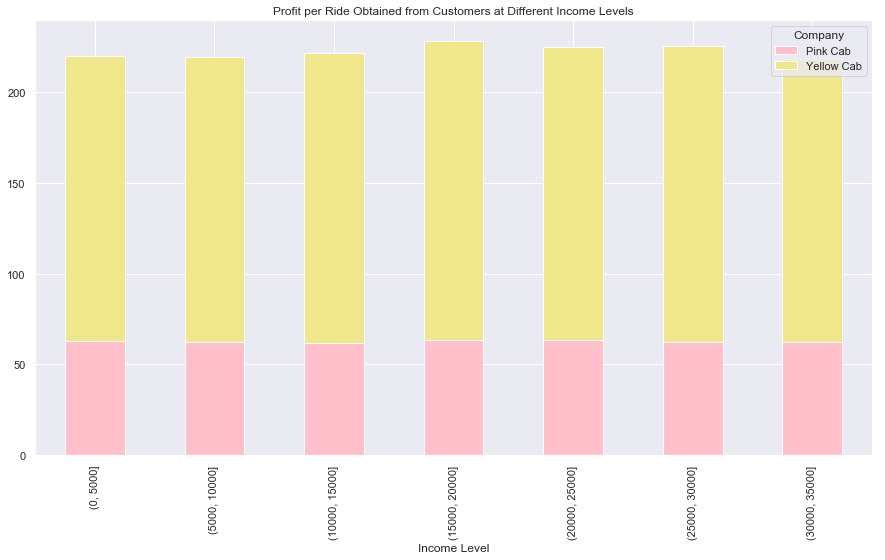

In [56]:
income_total = df_merged.groupby(['Income Level','Company'])['Profit_Earned'].mean()
income_total.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Profit per Ride Obtained from Customers at Different Income Levels")

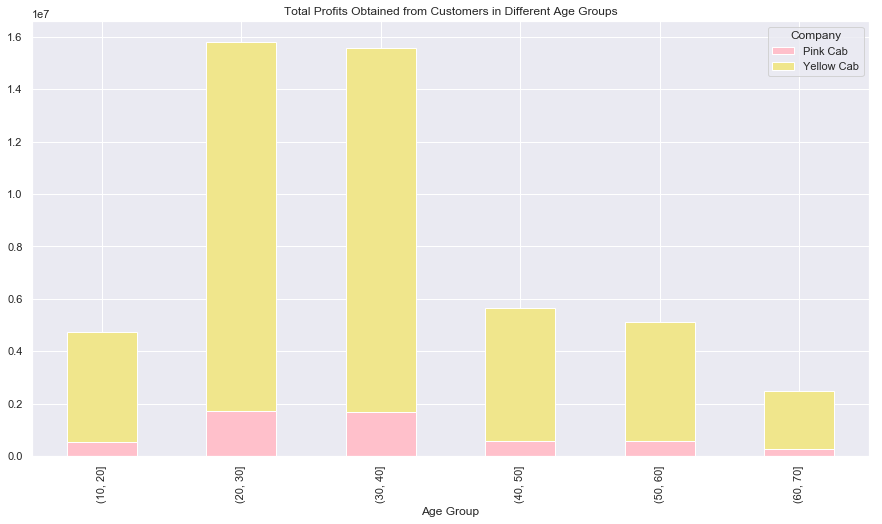

In [57]:
# Total profit from customers at different ages

age_total = df_merged.groupby(['Age Group','Company'])['Profit_Earned'].sum()
age_total.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Total Profits Obtained from Customers in Different Age Groups")


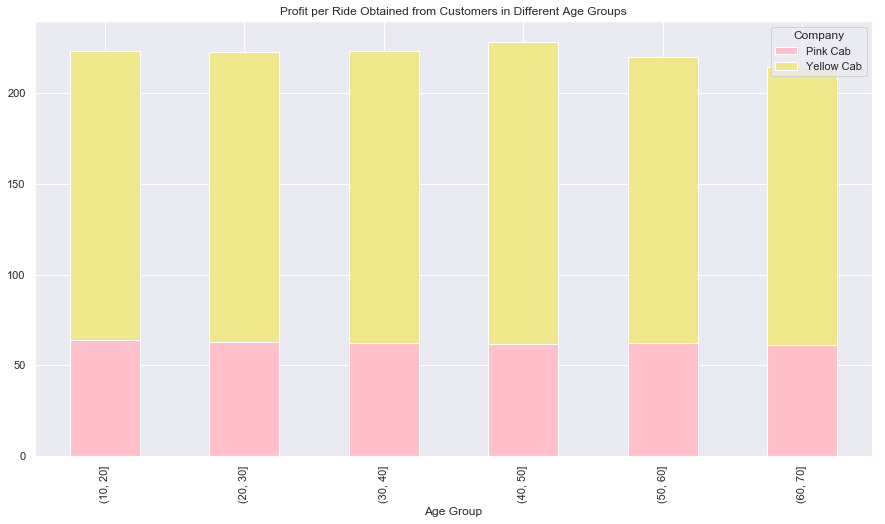

In [58]:
# Mean profit per ride for different age groups

age_mean = df_merged.groupby(['Age Group','Company'])['Profit_Earned'].mean()
age_mean.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Profit per Ride Obtained from Customers in Different Age Groups")

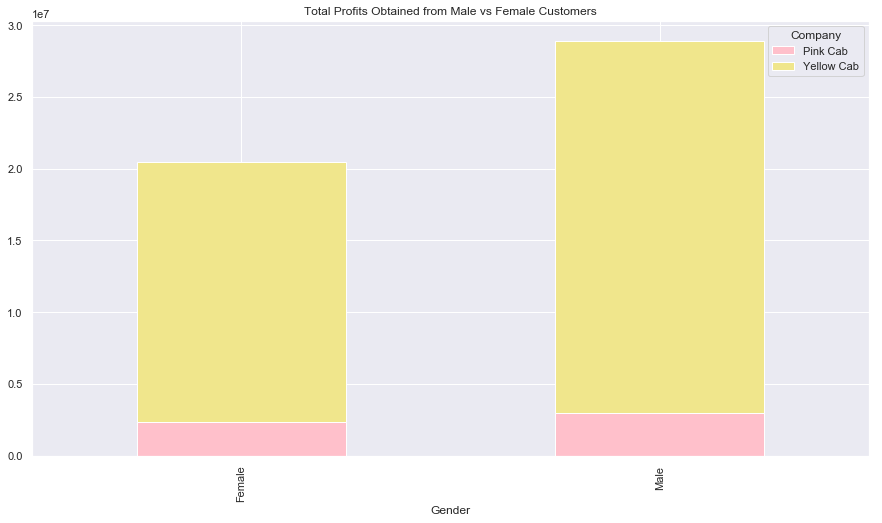

In [59]:
# Total profit from male vs female customers

gender_total = df_merged.groupby(['Gender','Company'])['Profit_Earned'].sum()
gender_total.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Total Profits Obtained from Male vs Female Customers")

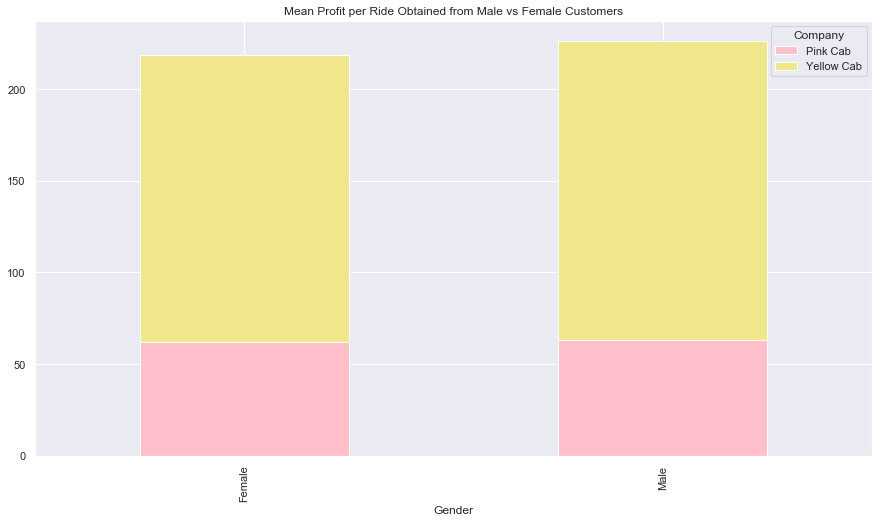

In [60]:
# Mean profit per ride from male vs female customers

gender_mean = df_merged.groupby(['Gender','Company'])['Profit_Earned'].mean()
gender_mean.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Mean Profit per Ride Obtained from Male vs Female Customers")

### Question 5: How Have Profits Changed Over the Years and When Are Customers Most Likely to Use a Cab?

#### Creating year, month, and day column for 'date traveled' 

In [62]:
df_merged['Year'] = pd.DatetimeIndex(df_merged['Date of Travel']).year

In [63]:
df_merged['Month'] = pd.DatetimeIndex(df_merged['Date of Travel']).month

In [64]:
df_merged['Day'] = pd.DatetimeIndex(df_merged['Date of Travel']).day

In [65]:
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit_Earned,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit_per_km,Income Level,Age Group,Year,Month,Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,1.882266,"(10000, 15000]","(20, 30]",2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,10.739870,"(10000, 15000]","(20, 30]",2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,4.574571,"(10000, 15000]","(20, 30]",2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,0.826904,"(5000, 10000]","(20, 30]",2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,6.981330,"(5000, 10000]","(20, 30]",2018,4,21


#### Displaying profits over the years for both cab companies

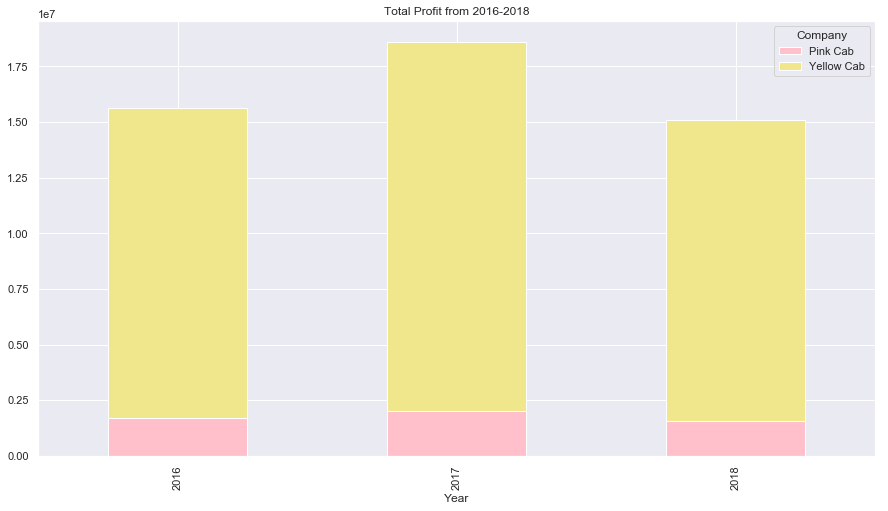

In [68]:
#Total profit for each company from 2016-2018

year_total = df_merged.groupby(['Year','Company'])['Profit_Earned'].sum()
year_total.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Total Profit from 2016-2018")

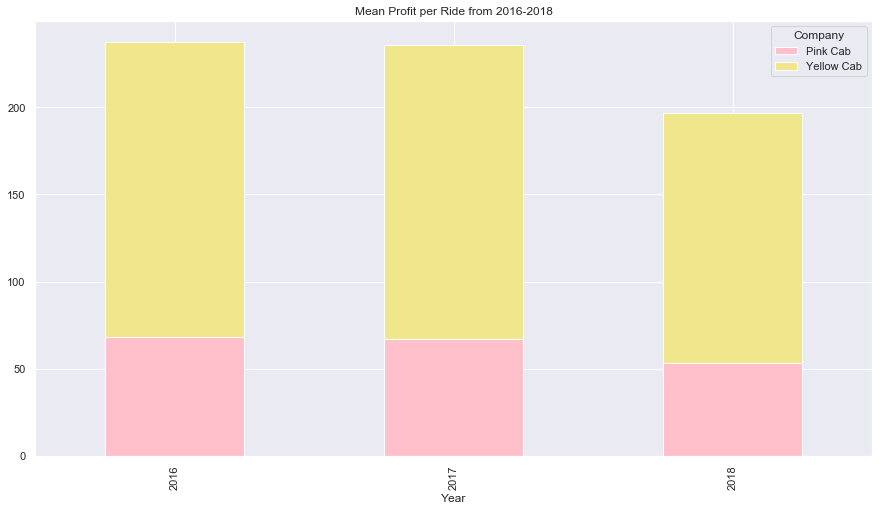

In [69]:
year_mean = df_merged.groupby(['Year','Company'])['Profit_Earned'].mean()
year_mean.unstack().plot(kind='bar', stacked=True, color = ('pink','khaki'),title = "Mean Profit per Ride from 2016-2018")

([<matplotlib.axis.XTick at 0x1d39b47c708>,
 <a list of 3 Text xticklabel objects>)

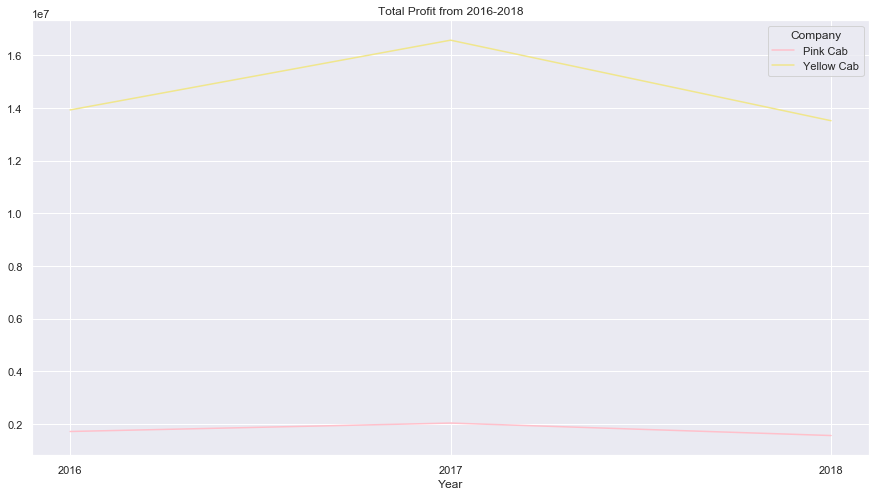

In [74]:
year_mean = df_merged.groupby(['Year','Company'])['Profit_Earned'].sum()
year_mean.unstack().plot(kind='line', color = ('pink','khaki'),title = "Total Profit from 2016-2018")
plt.xticks(np.arange(min(df_merged['Year']), max(df_merged['Year']) + 1, 1.0))

([<matplotlib.axis.XTick at 0x1d39b064108>,
 <a list of 3 Text xticklabel objects>)

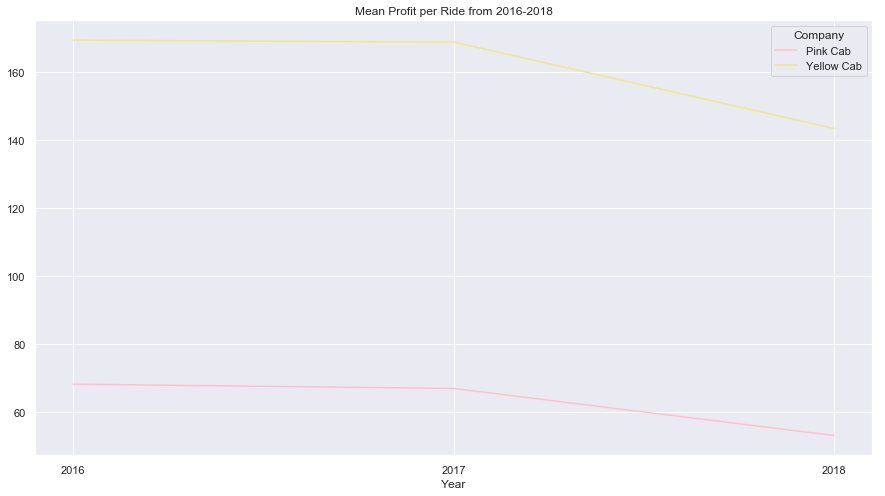

In [73]:
year_mean = df_merged.groupby(['Year','Company'])['Profit_Earned'].mean()
year_mean.unstack().plot(kind='line', color = ('pink','khaki'),title = "Mean Profit per Ride from 2016-2018")
plt.xticks(np.arange(min(df_merged['Year']), max(df_merged['Year']) + 1, 1.0))

#### Determining which time of the year and month have the most customers and bring in the most profit

([<matplotlib.axis.XTick at 0x1d39b4fb3c8>,
 <a list of 12 Text xticklabel objects>)

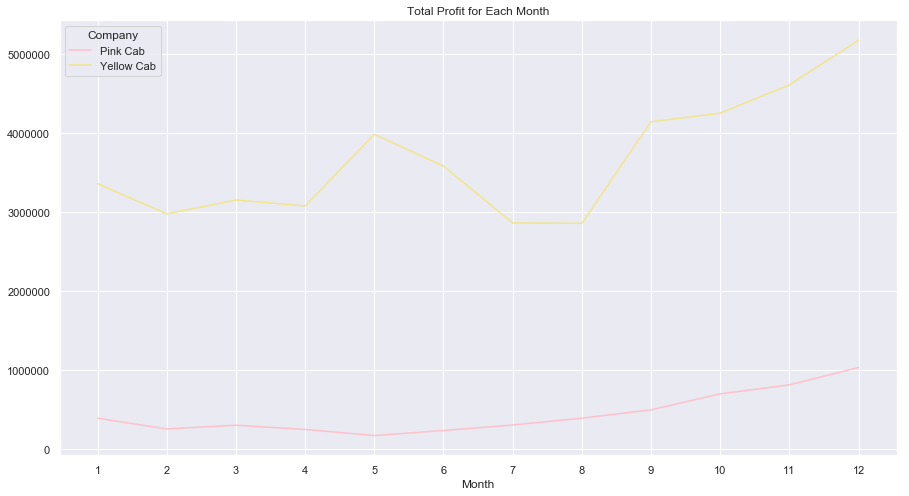

In [75]:
month_total = df_merged.groupby(['Month','Company'])['Profit_Earned'].sum()
month_total.unstack().plot(kind='line', color = ('pink','khaki'),title = "Total Profit for Each Month")
plt.xticks(np.arange(min(df_merged['Month']), max(df_merged['Month']) + 1, 1.0))

([<matplotlib.axis.XTick at 0x1d39f7680c8>,
 <a list of 12 Text xticklabel objects>)

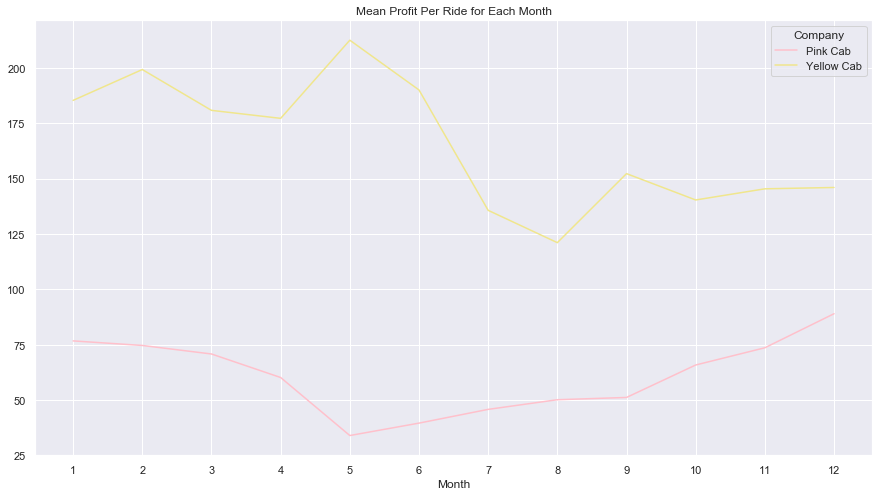

In [117]:
month_mean = df_merged.groupby(['Month','Company'])['Profit_Earned'].mean()
month_mean.unstack().plot(kind='line', color = ('pink','khaki'),title = "Mean Profit Per Ride for Each Month")
plt.xticks(np.arange(min(df_merged['Month']), max(df_merged['Month']) + 1, 1.0))

([<matplotlib.axis.XTick at 0x1d39b956cc8>,
 <a list of 31 Text xticklabel objects>)

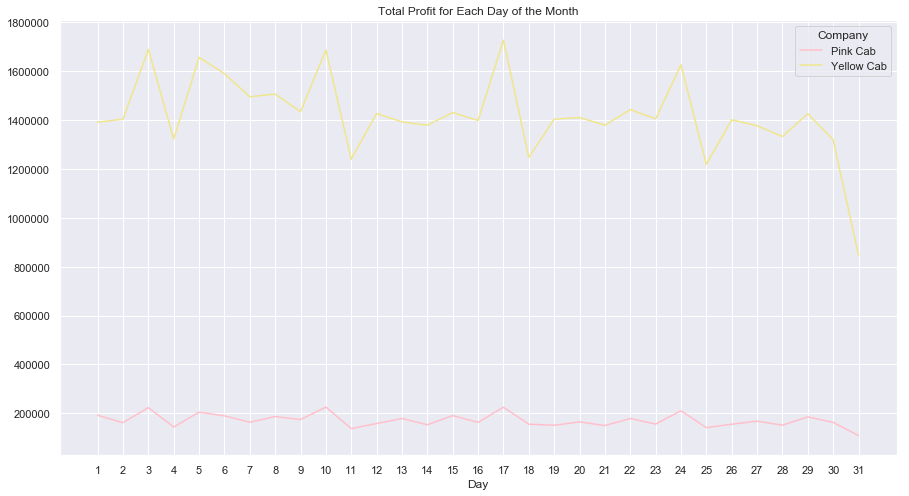

In [77]:
day_total = df_merged.groupby(['Day','Company'])['Profit_Earned'].sum()
day_total.unstack().plot(kind='line', color = ('pink','khaki'),title = "Total Profit for Each Day of the Month")
plt.xticks(np.arange(min(df_merged['Day']), max(df_merged['Day']) + 1, 1.0))

([<matplotlib.axis.XTick at 0x1d39bdd2548>,
 <a list of 31 Text xticklabel objects>)

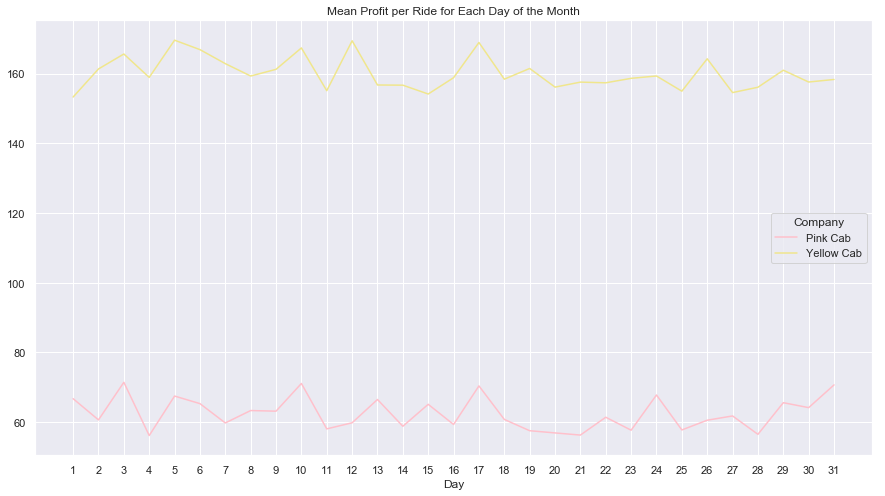

In [78]:
day_mean = df_merged.groupby(['Day','Company'])['Profit_Earned'].mean()
day_mean.unstack().plot(kind='line', color = ('pink','khaki'),title = "Mean Profit per Ride for Each Day of the Month")
plt.xticks(np.arange(min(df_merged['Day']), max(df_merged['Day']) + 1, 1.0))

## Results and Recommendations

### Results

#### Total Profit and Mean Profit Per Ride:

The Yellow Cab company has earned a significantly greater total profit, as well as a greater average profit per ride, than the Pink Cab company. Looking at each city, the Yellow Cab company earns a greater total profit, as well as a greater average profit per ride, than the Pink Cab company in almost every city. 


#### Profit Per Km: 

For most cities, with the exception of cities such as Boston, MA and Tucson, AZ, the average profit per km was higher for the yellow cab company than the pink cab company.  



#### Customer Base and Number of Rides:

The yellow cab company serves more unique customers (39896) than the pink cab company (32330). In terms of the number of rides, the yellow cab company has given significantly more rides than the pink cab company. 


#### Most Profitable Cities:


In terms of total profits, New York City came out on top, while other cities such as Los Angeles, CA, Chicago, IL, and Washington D.C. also earned significantly higher profits compared to other cities. New York, NY and Silicon Valley were the two cities with the highest average profit per ride and highest average profit per km.


#### Types of Customers that Typically Use Cabs

For both cab companies, most customers were between the ages of 18-40, with a small number of customers belonging to the 40+ age range. The greatest total profit was earned from customers in the 20-30 and 30-40 age ranges for both companies. However, the average profit per ride was approximately the same for all age ranges. The companies both had customers in all age groups, but the yellow cab company had significantly more customers than the pink cab company for all age groups. 

For both cab companies, most customers fell within the income range of $\$$1,000 - $\$$25,000 per month, with a small number of customers earning greater than $\$$25,000 per month. The greatest total profit was earned from customers whose income fell between $\$$5,000 - $\$$25,000 per month. However, the average profit per ride was approximately the same across all income ranges. The companies both had customers in all income ranges, but the yellow cab company had significantly more customers than the pink cab company at every income level.

For both cab companies, there were slightly more male than female customers. A greater total profit was earned from male customers, but the average profit per ride was approximately the same for males and females. The yellow cab company had more male customers than the pink cab company, as well as more female customers.


#### Profit Over Time:

Yearly Profit Analysis: For both cab companies, average profit per ride was approximately the same from 2016-2017, and took a slight dip in 2018. The total profit increased from 2016-2017, and then decreased in 2018.

Seasonality/Trends: For the yellow cab company, profit (total profit, as well as average profit per ride) was highest in the Spring season. On the other hand, profit (total profit, as well as average profit per ride) was highest in the Fall and Winter seasons for the pink cab company. The day of the month does not seem to be very significant in determining a company's profit, but this data can possibly be further analyzed to look at how much profit is earned on weekends vs weekdays, holidays vs regular days, etc. 






## Recommendations

Based on the above analysis, the yellow cab company is doing much better than the pink cab company in terms of profit, customer base, and number of rides. Thus, investing in the yellow cab company would be the best plan.